In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("assign/data.csv")

C:\Users\1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [4]:
df.dtypes

report_date          object
location             object
location_type        object
data_field           object
data_field_code      object
time_period         float64
time_period_type    float64
value                object
unit                 object
dtype: object

In [5]:
df.head(3)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases


In [6]:
df.time_period.unique()

array([nan])

In [7]:
df.time_period.unique()

array([nan])

In [8]:
df.drop(['time_period','time_period_type'],axis=1,inplace=True)

# Q1. Show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [9]:
df.query("location=='Argentina-Catamarca' & data_field_code=='AR0005'")[['report_date','value']]

,report_date,value
16,2016-03-19,14
160,2016-03-26,15
304,2016-04-02,15
448,2016-04-09,15
592,2016-04-16,15
736,2016-04-29,15
880,2016-05-07,16
1024,2016-05-14,15
1168,2016-05-22,16
1312,2016-05-30,15


# Q2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference

In [10]:
df.head(15)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases


In [11]:
df.query("unit=='cases' & location=='Argentina-Catamarca'").groupby('report_date').groups

{'2016-03-19': Int64Index([12, 13, 14, 15, 16, 17], dtype='int64'),
 '2016-03-26': Int64Index([156, 157, 158, 159, 160, 161], dtype='int64'),
 '2016-04-02': Int64Index([300, 301, 302, 303, 304, 305], dtype='int64'),
 '2016-04-09': Int64Index([444, 445, 446, 447, 448, 449], dtype='int64'),
 '2016-04-16': Int64Index([588, 589, 590, 591, 592, 593], dtype='int64'),
 '2016-04-29': Int64Index([732, 733, 734, 735, 736, 737], dtype='int64'),
 '2016-05-07': Int64Index([876, 877, 878, 879, 880, 881], dtype='int64'),
 '2016-05-14': Int64Index([1020, 1021, 1022, 1023, 1024, 1025], dtype='int64'),
 '2016-05-22': Int64Index([1164, 1165, 1166, 1167, 1168, 1169], dtype='int64'),
 '2016-05-30': Int64Index([1308, 1309, 1310, 1311, 1312, 1313], dtype='int64'),
 '2016-06-06': Int64Index([1452, 1453, 1454, 1455, 1456, 1457], dtype='int64'),
 '2016-06-13': Int64Index([1596, 1597, 1598, 1599, 1600, 1601], dtype='int64'),
 '2016-06-18': Int64Index([1740, 1741, 1742, 1743, 1744, 1745], dtype='int64'),
 '2016-0

In [12]:
dic_rd1=df.query("unit=='cases' & location=='Argentina-Catamarca'").groupby('report_date').groups

In [13]:
for i in dic_rd1:
    s=0
    for j in dic_rd1[i]:
        s+=int(df.loc[j]["value"])
    dic_rd1[i]=s

In [14]:
dic_rd1

{'2016-03-19': 14,
 '2016-03-26': 15,
 '2016-04-02': 15,
 '2016-04-09': 15,
 '2016-04-16': 15,
 '2016-04-29': 15,
 '2016-05-07': 16,
 '2016-05-14': 15,
 '2016-05-22': 16,
 '2016-05-30': 15,
 '2016-06-06': 15,
 '2016-06-13': 15,
 '2016-06-18': 15,
 '2016-06-26': 16}

In [15]:
dic_rd2=df.query("unit=='cases' & location=='Argentina-CABA'").groupby('report_date').groups

In [16]:
for i in dic_rd2:
    s=0
    for j in dic_rd2[i]:
        s+=int(df.loc[j]["value"])
    dic_rd2[i]=s

In [17]:
dic_rd2

{'2016-03-19': 78,
 '2016-03-26': 92,
 '2016-04-02': 94,
 '2016-04-09': 97,
 '2016-04-16': 98,
 '2016-04-29': 101,
 '2016-05-07': 255,
 '2016-05-14': 126,
 '2016-05-22': 260,
 '2016-05-30': 132,
 '2016-06-06': 134,
 '2016-06-13': 136,
 '2016-06-18': 136,
 '2016-06-26': 160}

In [18]:
list(zip(dic_rd2.keys(),dic_rd2.values()))

[('2016-03-19', 78),
 ('2016-03-26', 92),
 ('2016-04-02', 94),
 ('2016-04-09', 97),
 ('2016-04-16', 98),
 ('2016-04-29', 101),
 ('2016-05-07', 255),
 ('2016-05-14', 126),
 ('2016-05-22', 260),
 ('2016-05-30', 132),
 ('2016-06-06', 134),
 ('2016-06-13', 136),
 ('2016-06-18', 136),
 ('2016-06-26', 160)]

In [19]:
list(zip(dic_rd1.keys(),dic_rd1.values(),dic_rd2.keys(),dic_rd2.values()))

[('2016-03-19', 14, '2016-03-19', 78),
 ('2016-03-26', 15, '2016-03-26', 92),
 ('2016-04-02', 15, '2016-04-02', 94),
 ('2016-04-09', 15, '2016-04-09', 97),
 ('2016-04-16', 15, '2016-04-16', 98),
 ('2016-04-29', 15, '2016-04-29', 101),
 ('2016-05-07', 16, '2016-05-07', 255),
 ('2016-05-14', 15, '2016-05-14', 126),
 ('2016-05-22', 16, '2016-05-22', 260),
 ('2016-05-30', 15, '2016-05-30', 132),
 ('2016-06-06', 15, '2016-06-06', 134),
 ('2016-06-13', 15, '2016-06-13', 136),
 ('2016-06-18', 15, '2016-06-18', 136),
 ('2016-06-26', 16, '2016-06-26', 160)]

In [20]:
np.array(list(dic_rd2.values()))-np.array(list(dic_rd1.values()))

array([ 64,  77,  79,  82,  83,  86, 239, 111, 244, 117, 119, 121, 121,
       144])

In [21]:
dif=np.array(list(dic_rd2.values()))-np.array(list(dic_rd1.values()))

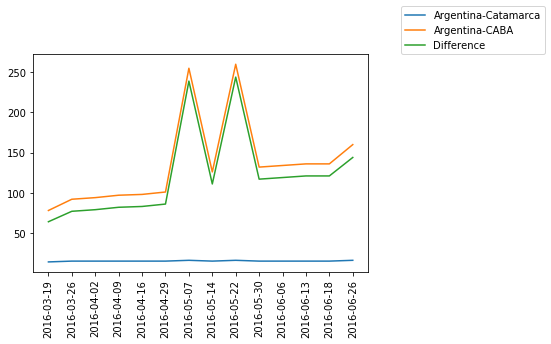

In [22]:
# plt.figure(figsize=(10,10))
plt.plot(dic_rd1.keys(),dic_rd1.values(),label="Argentina-Catamarca")
plt.plot(dic_rd2.keys(),dic_rd2.values(),label="Argentina-CABA")
plt.plot(dic_rd1.keys(),dif,label="Difference")
plt.legend(loc=(1.1,1))
plt.xticks(rotation=90)
plt.show()

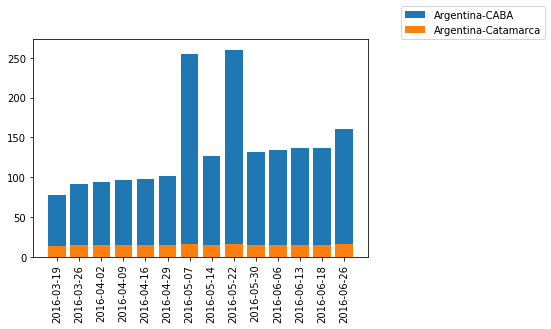

In [23]:
# plt.figure(figsize=(10,10))
plt.bar(dic_rd2.keys(),dic_rd2.values(),label="Argentina-CABA")
plt.bar(dic_rd1.keys(),dic_rd1.values(),label="Argentina-Catamarca")
plt.legend(loc=(1.1,1))
plt.xticks(rotation=90)
plt.show()

# Q3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [24]:
len(df.location.unique())

1674

In [25]:
# 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [26]:
Buenos_df=df.query("location=='Argentina-Buenos_Aires'")
CABA_df=df.query("location=='Argentina-CABA'")
Catamarca_df=df.query("location=='Argentina-Catamarca'")

In [27]:
print(Buenos_df.shape , CABA_df.shape , Catamarca_df.shape)

(84, 7) (84, 7) (84, 7)


In [28]:
for i in CABA_df.columns:
    print(CABA_df[i].unique())

['2016-03-19' '2016-03-26' '2016-04-02' '2016-04-09' '2016-04-16'
 '2016-04-29' '2016-05-07' '2016-05-14' '2016-05-22' '2016-05-30'
 '2016-06-06' '2016-06-13' '2016-06-18' '2016-06-26']
['Argentina-CABA']
['province']
['cumulative_confirmed_local_cases' 'cumulative_probable_local_cases'
 'cumulative_confirmed_imported_cases'
 'cumulative_probable_imported_cases' 'cumulative_cases_under_study'
 'cumulative_cases_discarded']
['AR0001' 'AR0002' 'AR0003' 'AR0004' 'AR0005' 'AR0006']
['0' '9' '68' '1' '81' '2' '83' '86' '87' '90' '8' '245' '115' '250' '121'
 '123' '125' '149']
['cases']


In [29]:
Buenos_dic=Buenos_df.groupby('data_field').groups
CABA_dic=CABA_df.groupby('data_field').groups
Catamarca_dic=Catamarca_df.groupby('data_field').groups

In [30]:
Buenos_dic

{'cumulative_cases_discarded': Int64Index([5, 149, 293, 437, 581, 725, 869, 1013, 1157, 1301, 1445, 1589,
             1733, 1877],
            dtype='int64'),
 'cumulative_cases_under_study': Int64Index([4, 148, 292, 436, 580, 724, 868, 1012, 1156, 1300, 1444, 1588,
             1732, 1876],
            dtype='int64'),
 'cumulative_confirmed_imported_cases': Int64Index([2, 146, 290, 434, 578, 722, 866, 1010, 1154, 1298, 1442, 1586,
             1730, 1874],
            dtype='int64'),
 'cumulative_confirmed_local_cases': Int64Index([0, 144, 288, 432, 576, 720, 864, 1008, 1152, 1296, 1440, 1584,
             1728, 1872],
            dtype='int64'),
 'cumulative_probable_imported_cases': Int64Index([3, 147, 291, 435, 579, 723, 867, 1011, 1155, 1299, 1443, 1587,
             1731, 1875],
            dtype='int64'),
 'cumulative_probable_local_cases': Int64Index([1, 145, 289, 433, 577, 721, 865, 1009, 1153, 1297, 1441, 1585,
             1729, 1873],
            dtype='int64')}

In [31]:
print(Buenos_df.report_date.unique())
print(CABA_df.report_date.unique())
print(Catamarca_df.report_date.unique())

['2016-03-19' '2016-03-26' '2016-04-02' '2016-04-09' '2016-04-16'
 '2016-04-29' '2016-05-07' '2016-05-14' '2016-05-22' '2016-05-30'
 '2016-06-06' '2016-06-13' '2016-06-18' '2016-06-26']
['2016-03-19' '2016-03-26' '2016-04-02' '2016-04-09' '2016-04-16'
 '2016-04-29' '2016-05-07' '2016-05-14' '2016-05-22' '2016-05-30'
 '2016-06-06' '2016-06-13' '2016-06-18' '2016-06-26']
['2016-03-19' '2016-03-26' '2016-04-02' '2016-04-09' '2016-04-16'
 '2016-04-29' '2016-05-07' '2016-05-14' '2016-05-22' '2016-05-30'
 '2016-06-06' '2016-06-13' '2016-06-18' '2016-06-26']


In [32]:
for i in Buenos_dic:
    ll=[]
    for j in Buenos_dic[i]:
        ll.append(int(Buenos_df.loc[j]["value"]))
    Buenos_dic[i]=ll
    
for i in CABA_dic:
    ll=[]
    for j in CABA_dic[i]:
        ll.append(int(CABA_df.loc[j]["value"]))
    CABA_dic[i]=ll
    
for i in Catamarca_dic:
    ll=[]
    for j in Catamarca_dic[i]:
        ll.append(int(Catamarca_df.loc[j]["value"]))
    Catamarca_dic[i]=ll

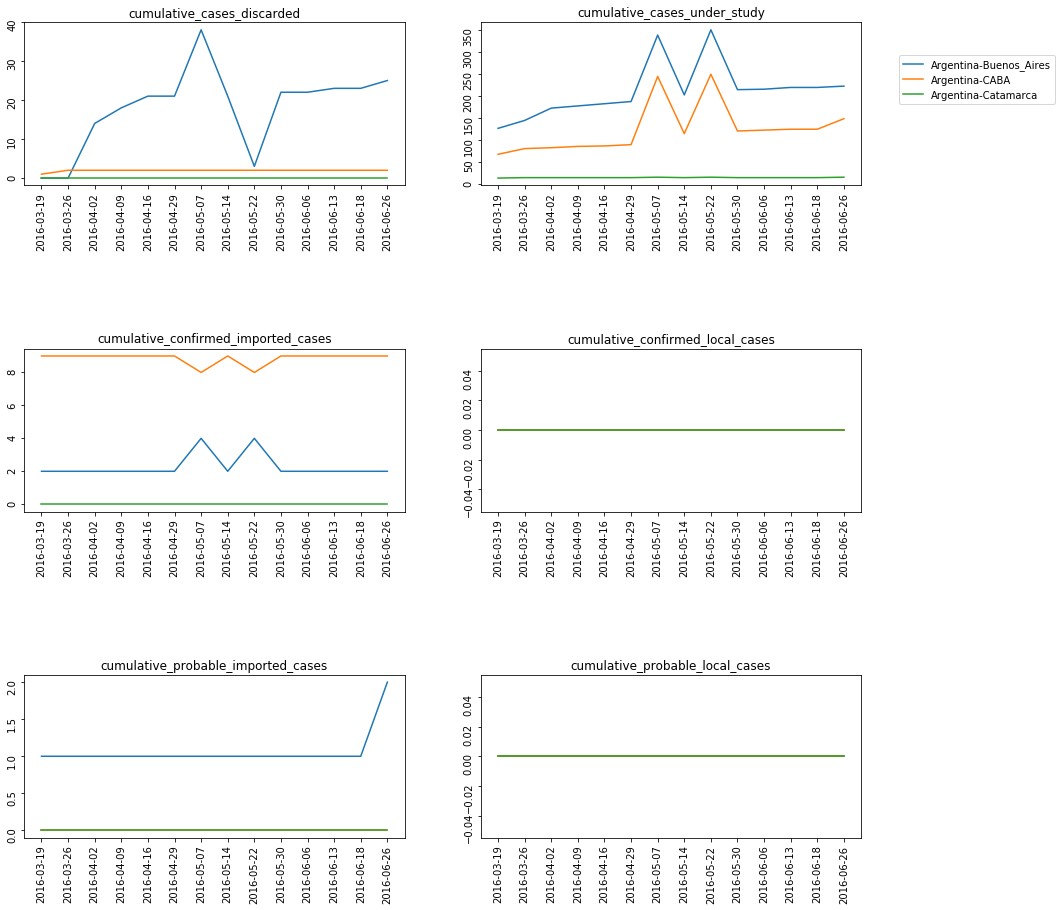

In [33]:
fig, axs = plt.subplots(3,2, figsize=(15,15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=1,wspace=.2)
axs = axs.ravel()
xx=Buenos_df.report_date.unique()
j=0
for i in Buenos_dic:
    axs[j].set_title(i)
    axs[j].plot(xx,Buenos_dic[i],label='Argentina-Buenos_Aires')
    axs[j].plot(xx,CABA_dic[i],label='Argentina-CABA')
    axs[j].plot(xx,Catamarca_dic[i],label='Argentina-Catamarca')
    axs[j].tick_params(labelrotation=90)
    j+=1
plt.legend(loc=(1.1,4.5))
plt.show()

# Q4. Build a program to predict the correct word for wrongly typed word

In [34]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [35]:
print(spell.correction('speld'))

speed


In [36]:
print(spell.correction('whst'))

what


In [37]:
print(spell.correction('numbr'))

number


In [38]:
print(spell.correction('good'))

good


In [39]:
print(spell.candidates('speld'))

{'speed', 'spell', 'sped', 'spelt', 'spend'}


In [40]:
print(spell.candidates('whst'))

{'what', 'hst', 'whist', 'whs', 'whet', 'wast', 'west', 'whit'}


In [41]:
print(spell.candidates('numbr'))

{'numb', 'numbs', 'number'}


In [42]:
print(spell.candidates('good'))

{'good'}


In [43]:
import re
from collections import Counter

def words(text):
    return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('assign/big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    return WORDS[word] / N

def edits1(word):
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def known(words): 
    return set(w for w in words if w in WORDS)

def candidates(word): 
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def correction(word): 
    return max(candidates(word), key=P)

In [44]:
print(correction('speld'))

spend


In [45]:
print(correction('whst'))

what


In [46]:
print(correction('numbr'))

number


In [47]:
print(correction('good'))

good


In [48]:
print(candidates('speld'))

{'speed', 'spell', 'spend', 'sped'}


In [49]:
print(candidates('whst'))

{'what', 'whist', 'wast', 'west', 'whit'}


In [50]:
print(candidates('numbr'))

{'numb', 'number'}


In [51]:
print(candidates('good'))

{'good'}
